In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot sigmoid function


Accuracy: 0.8222222222222222


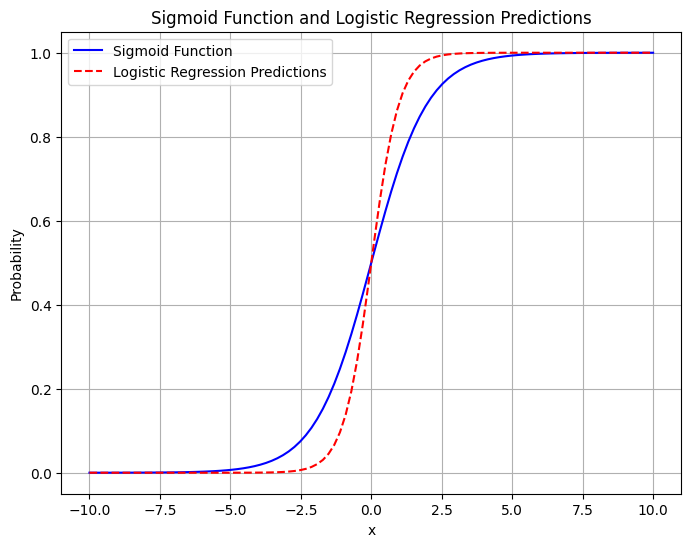

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis
x_values = np.linspace(-10, 10, 100)

# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(x_values)

# Reshape x_values to 2D array
x_values_2d = x_values.reshape(-1, 1)

# Initialize logistic regression model
log_reg = LogisticRegression()

# Train the model (just for demonstration, not necessary for visualization)
# We're fitting an arbitrary model here to get the coefficients for visualization
log_reg.fit(x_values_2d, np.round(y_values))

# Calculate predicted probabilities for the x_values
x_prob = log_reg.predict_proba(x_values_2d)[:, 1]

# Plot sigmoid function and logistic regression predictions
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.plot(x_values, x_prob, label='Logistic Regression Predictions', color='red', linestyle='--')
plt.title('Sigmoid Function and Logistic Regression Predictions')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

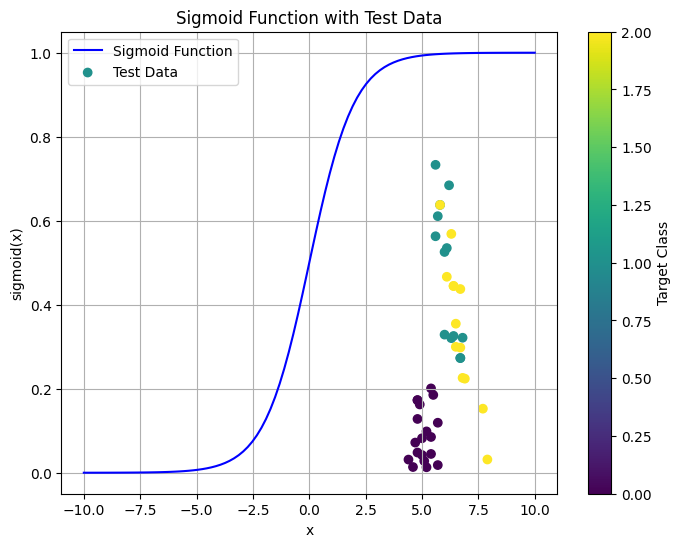

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for the x-axis
x_values = np.linspace(-10, 10, 100)
# Calculate corresponding y values using the sigmoid function
y_values = sigmoid(x_values)

# Calculate predicted probabilities for the test set
y_prob = log_reg.predict_proba(X_test)
# Extract probabilities for class 1
y_prob_class1 = y_prob[:, 1]

# Plot sigmoid function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
plt.scatter(X_test[:, 0], y_prob_class1, c=y_test, cmap='viridis', label='Test Data')
plt.title('Sigmoid Function with Test Data')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend()
plt.grid(True)
plt.colorbar(label='Target Class')
plt.show()

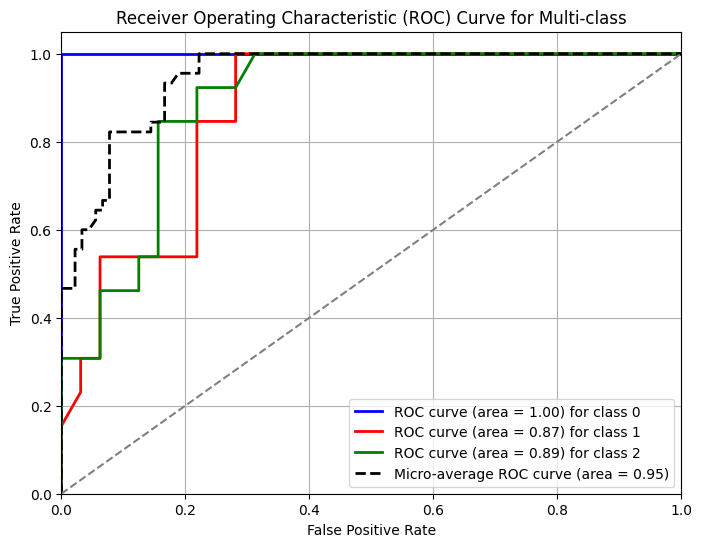

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Reshape y_prob to have shape (n_samples, n_classes)
y_prob = log_reg.predict_proba(X_test)

for i in range(3):  # Three classes in the iris dataset
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='black', lw=2, linestyle='--', label='Micro-average ROC curve (area = %0.2f)' % roc_auc_micro)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



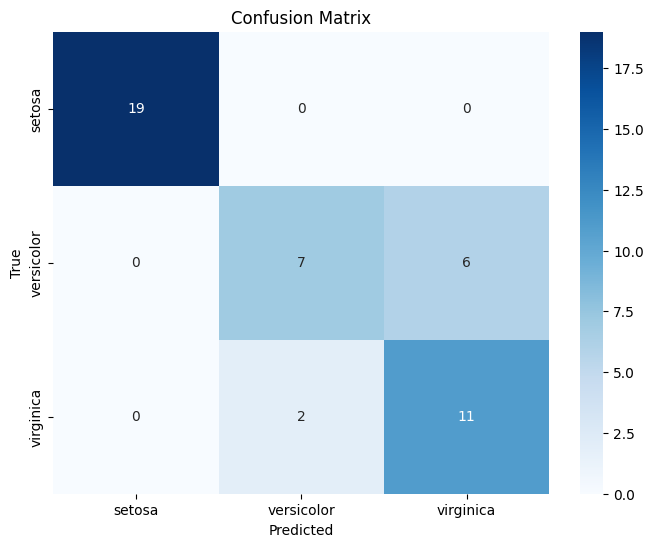

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
